<a href="https://colab.research.google.com/github/AycaCicek/DenetimsizOgrenme/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

In [4]:
data=pd.read_csv("/content/USArrests.csv",index_col=0)
data.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [5]:
data.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


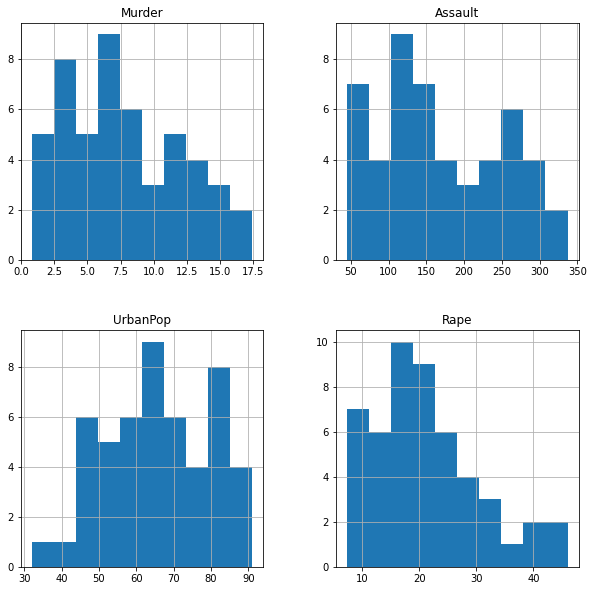

In [9]:
data.hist(figsize=(10,10));

In [12]:
kmeans=KMeans(n_clusters=4)#başta bizim küme sayısını belirtmemiz lazım...

In [13]:
k_fit=kmeans.fit(data)

In [16]:
print(f"""
Küme Sayısı : {k_fit.n_clusters}
Merkezler : 
{k_fit.cluster_centers_}
Gözlem Birimleri Sınıf Etiketleri:
{k_fit.labels_}
""")


Küme Sayısı : 4
Merkezler : 
[[  2.95        62.7         53.9         11.51      ]
 [ 11.8125     272.5625      68.3125      28.375     ]
 [  8.21428571 173.28571429  70.64285714  22.84285714]
 [  5.59       112.4         65.6         17.27      ]]
Gözlem Birimleri Sınıf Etiketleri:
[1 1 1 2 1 2 3 1 1 2 0 3 1 3 0 3 3 1 0 1 2 1 0 1 2 3 3 1 0 2 1 1 1 0 3 2 2
 3 2 1 0 2 2 3 0 2 2 0 0 2]



In [17]:
#Kümelerin Görselleştirilmesi
k_means=KMeans(n_clusters=2).fit(data)

In [18]:
kumeler=k_means.labels_
kumeler

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

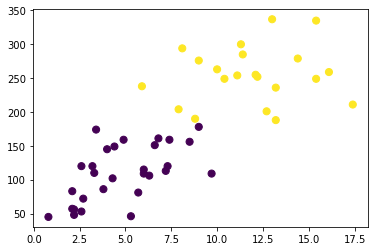

In [20]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=kumeler,s=50,cmap="viridis")

In [23]:
merkezler=k_means.cluster_centers_
merkezler

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

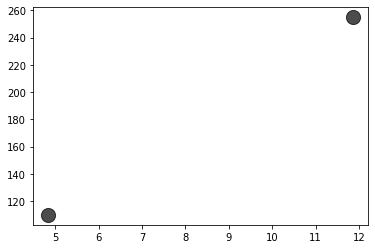

In [25]:
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.7)

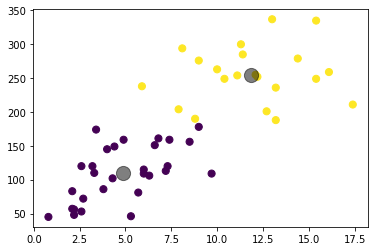

In [27]:
plt.scatter(data.iloc[:,0],data.iloc[:,1],c=kumeler,s=50,cmap="viridis")
plt.scatter(merkezler[:,0],merkezler[:,1],c="black",s=200,alpha=0.5)

Optimum Küme Sayısı

In [28]:
#ELBOW YONTEMI

In [29]:
ssd=[]

K=range(1,30)#küme sayısı gözlem sayısından az olmalı.

for k in K:
  kmeans=KMeans(n_clusters=k).fit(data)
  ssd.append(kmeans.inertia_)#->uzaklıkları eklicek

Text(0.5, 1.0, 'Optimum Küme Sayısı İçin Elbow ')

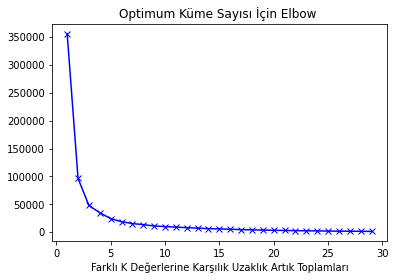

In [30]:
plt.plot(K,ssd,"bx-")
plt.xlabel("Farklı K Değerlerine Karşılık Uzaklık Artık Toplamları")
plt.title("Optimum Küme Sayısı İçin Elbow ")

In [31]:
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
from yellowbrick.cluster import KElbowVisualizer

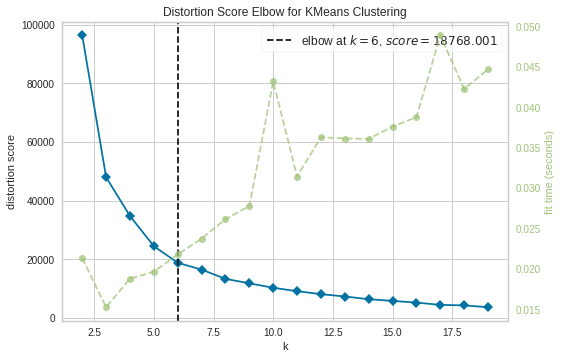

In [33]:
kmeans=KMeans()
visu=KElbowVisualizer(kmeans,k=(2,20))
visu.fit(data)
visu.poof()

Final Model 

In [34]:
k_means=KMeans(n_clusters=4).fit(data)
k_means

KMeans(n_clusters=4)

In [35]:
kumeler=k_means.labels_

In [36]:
pd.DataFrame({"Eyaletler":data.index,"Kümeler":kumeler})

,Eyaletler,Kümeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,3
4,California,0
5,Colorado,3
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,3


In [37]:
data["Kume_No"]=kumeler
data.head(10)

,Murder,Assault,UrbanPop,Rape,Kume_No
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,3
California,9.0,276,91,40.6,0
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,0
Florida,15.4,335,80,31.9,0
Georgia,17.4,211,60,25.8,3
